# Препроцессинг данных перед передачей в модель

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import torch
import seaborn as sns
import csv

from utils.tensors_analysis import CTTensorQualityAssessment
from MedicalNet.utils.train_test_split import split_dataset

## Представление dicom в виде тензора 

In [6]:
!python scripts/prepare_ct_tensors.py  

Found 6 studies in ../data/processed/train
Normalization mode: global_zscore
[1/6] Processing 01 ...
  Tensor shape: torch.Size([1, 3, 128, 160, 160])
  Min: 0.000, Max: 1.000
  Mean: 0.336, Std: 0.325
  Saved to data/tensors/01.pt
[2/6] Processing 02 ...
  Tensor shape: torch.Size([1, 3, 128, 160, 160])
  Min: 0.000, Max: 1.000
  Mean: 0.303, Std: 0.329
  Saved to data/tensors/02.pt
[3/6] Processing 03 ...
  Tensor shape: torch.Size([1, 3, 128, 160, 160])
  Min: 0.000, Max: 1.000
  Mean: 0.359, Std: 0.343
  Saved to data/tensors/03.pt
[4/6] Processing 04 ...
  Saved to data/tensors/04.pt
[5/6] Processing 05 ...
  Saved to data/tensors/05.pt
[6/6] Processing 06 ...
  Saved to data/tensors/06.pt
Done.


In [11]:
# Данные для записи в CSV
labels = [
    ['filename', 'label'],
    ['01.pt', '0'],
    ['02.pt', '0'],
    ['03.pt', '0'],
    ['04.pt', '1'],
    ['05.pt', '1'],
    ['06.pt', '1'],
]

# Создание и запись в CSV файл
with open('data/samples.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(labels)

print("CSV файл успешно создан: samples.csv")

CSV файл успешно создан: samples.csv


## Визуализация

In [9]:
assessor = CTTensorQualityAssessment()

# Укажите путь к вашему файлу
tensor_path = "data/tensors/02.pt"  # Замените на реальный путь

tensor = assessor.load_tensor_from_file(
    tensor_path, 
    target_shape=(1,3, 128, 256, 256)
)

quality_report = assessor.assess_tensor_quality(tensor, "my_scan")

Загрузка тензора из: data/tensors/02.pt
Загружен тензор формы: torch.Size([1, 3, 128, 160, 160])
=== Оценка качества нормализованного тензора: my_scan ===

Форма тензора: torch.Size([1, 3, 128, 160, 160]) ✓
Тип данных: torch.float32 ✓
Устройство: cpu
Размер в памяти: 37.50 МБ
NaN значения: Нет ✓
Inf значения: Нет ✓

Статистический анализ по каналам:
Канал 0: Mean=0.5924, Std=0.2914, Min=0.0140, Max=1.0000
Канал 1: Mean=0.2000, Std=0.2945, Min=0.0000, Max=1.0000
Канал 2: Mean=0.1162, Std=0.1544, Min=0.0000, Max=1.0000

Анализ артефактов по каналам:
Канал 0: Константные срезы=0.0%, Выбросы=0.0%, Плавные переходы=✓
Канал 1: Константные срезы=0.0%, Выбросы=0.0%, Плавные переходы=✓
Канал 2: Константные срезы=0.0%, Выбросы=1.6%, Плавные переходы=✓

Пространственный анализ по каналам:
Канал 0: Центр=0.8283, Углы=0.4921, Контраст=0.3363
Канал 1: Центр=0.3561, Углы=0.1064, Контраст=0.2497
Канал 2: Центр=0.2038, Углы=0.0656, Контраст=0.1382

Сравнение между каналами:
Средние значения каналов: ['

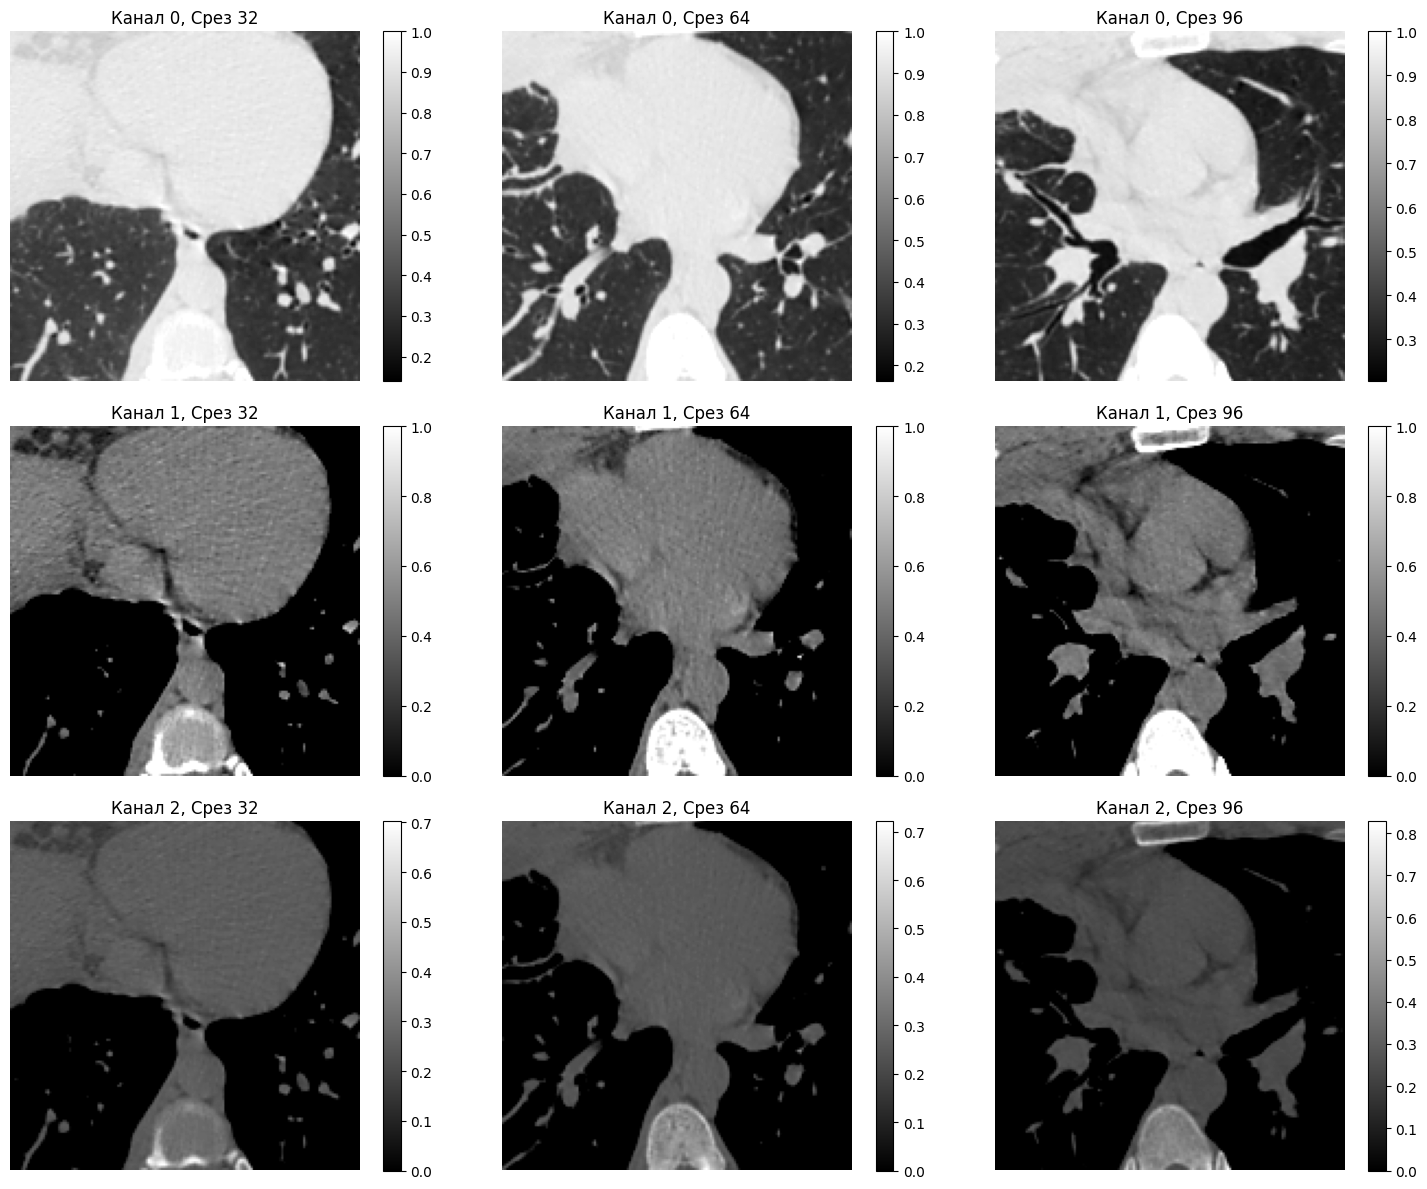

In [3]:
assessor.visualize_all_channels(tensor)

In [13]:
# Загрузка тензора
tensor = torch.load("data/tensors/01.pt")

# Просмотр размера
print(f"Форма тензора: {tensor.shape}")
print(f"Размерности: {tensor.dim()}")
print(f"Тип данных: {tensor.dtype}")
print(f"Устройство: {tensor.device}")

# Полная информация
print(f"Полная информация: {tensor}")

Форма тензора: torch.Size([1, 3, 128, 160, 160])
Размерности: 5
Тип данных: torch.float32
Устройство: cpu
Полная информация: tensor([[[[[0.9020, 0.9227, 0.9460,  ..., 0.3593, 0.3493, 0.3513],
           [0.9067, 0.9120, 0.9267,  ..., 0.3527, 0.3520, 0.3493],
           [0.9100, 0.9080, 0.9167,  ..., 0.3493, 0.3367, 0.3407],
           ...,
           [0.4920, 0.4620, 0.4340,  ..., 0.3267, 0.3407, 0.3333],
           [0.5500, 0.5393, 0.4733,  ..., 0.3273, 0.3393, 0.3340],
           [0.6827, 0.6453, 0.5733,  ..., 0.4620, 0.4240, 0.3413]],

          [[0.9153, 0.9160, 0.9167,  ..., 0.3773, 0.3653, 0.3700],
           [0.9240, 0.9147, 0.9140,  ..., 0.3913, 0.3840, 0.3560],
           [0.9287, 0.9147, 0.9093,  ..., 0.3840, 0.3520, 0.3293],
           ...,
           [0.4520, 0.4053, 0.4080,  ..., 0.3253, 0.3320, 0.3500],
           [0.5440, 0.4660, 0.4280,  ..., 0.3173, 0.3073, 0.3207],
           [0.6093, 0.5280, 0.4733,  ..., 0.3853, 0.3433, 0.3167]],

          [[0.9287, 0.9167, 0.9180,

In [10]:
assessor = CTTensorQualityAssessment()

# Укажите путь к вашему файлу
tensor_path = "data/tensors/01.pt"  # Замените на реальный путь

tensor = assessor.load_tensor_from_file(
    tensor_path, 
    target_shape=(1,3, 128, 256, 256)
)

quality_report = assessor.assess_tensor_quality(tensor, "my_scan")

Загрузка тензора из: data/tensors/01.pt
Загружен тензор формы: torch.Size([1, 3, 128, 160, 160])
=== Оценка качества нормализованного тензора: my_scan ===

Форма тензора: torch.Size([1, 3, 128, 160, 160]) ✓
Тип данных: torch.float32 ✓
Устройство: cpu
Размер в памяти: 37.50 МБ
NaN значения: Нет ✓
Inf значения: Нет ✓

Статистический анализ по каналам:
Канал 0: Mean=0.6440, Std=0.2802, Min=0.0867, Max=1.0000
Канал 1: Mean=0.2352, Std=0.2669, Min=0.0000, Max=1.0000
Канал 2: Mean=0.1288, Std=0.1352, Min=0.0000, Max=1.0000

Анализ артефактов по каналам:
Канал 0: Константные срезы=0.0%, Выбросы=0.0%, Плавные переходы=✓
Канал 1: Константные срезы=0.0%, Выбросы=0.0%, Плавные переходы=✓
Канал 2: Константные срезы=0.0%, Выбросы=0.5%, Плавные переходы=✓

Пространственный анализ по каналам:
Канал 0: Центр=0.8770, Углы=0.5658, Контраст=0.3112
Канал 1: Центр=0.4240, Углы=0.1509, Контраст=0.2731
Канал 2: Центр=0.2302, Углы=0.0868, Контраст=0.1434

Сравнение между каналами:
Средние значения каналов: ['

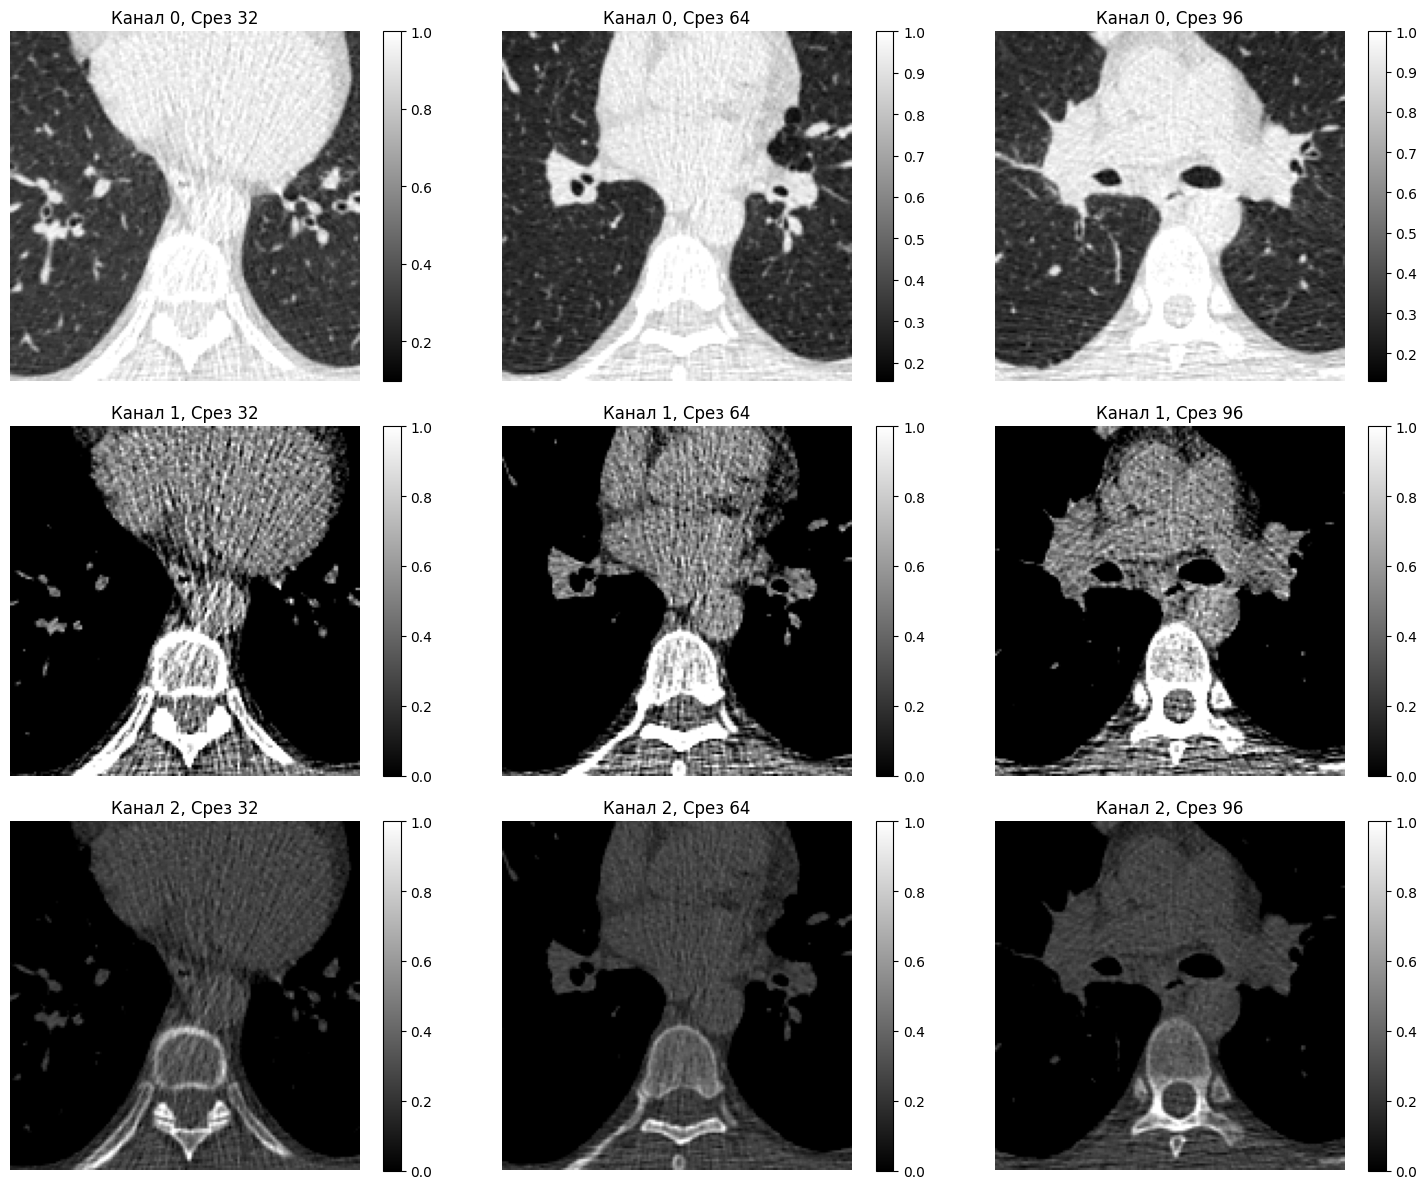

In [5]:
assessor.visualize_all_channels(tensor)

Для КТ данных оптимальный CV: 0.1-2.0
Проблемы:
CV < 0.1 (слишком низкий):

Данные слишком "плоские", мало вариативности
Возможно, изображение переобработано или слишком сглажено
Может указывать на потерю важных деталей анатомии
Нейросети будет сложно выделять признаки

CV > 2.0 (слишком высокий):

Слишком большой разброс значений
Возможно, есть сильные артефакты или шум
Данные могут быть не нормализованы
Может затруднить обучение модели

# Разделение на трейн и тест

In [2]:
split_dataset()

Dataset split completed!
Train samples: 4
Test samples: 2
Train class distribution:
label
0    2
1    2
Name: count, dtype: int64
Test class distribution:
label
0    1
1    1
Name: count, dtype: int64


(  filename  label
 1    02.pt      0
 5    06.pt      1
 0    01.pt      0
 4    05.pt      1,
   filename  label
 3    04.pt      1
 2    03.pt      0)

In [7]:
!python MedicalNet/train.py \
--model resnet \
--model_depth 10 \
--input_W 160 \
--input_H 160 \
--input_D 128 \
--n_seg_classes 2 \
--batch_size 1 \
--learning_rate 0.001 \
--n_epochs 10 \
--data_root data/train/tensors/\
--img_list data/train/labels.csv \
--pretrain_path MedicalNet/pretrain/resnet_18.pth \
--new_layer_names fc \
--num_workers 0 \
--no_cuda \
--save_intervals 10 \
--resume_path MedicalNet/pretrain/weight 

loading pretrained model MedicalNet/pretrain/resnet_18.pth
ResNet(
  (conv1): Conv3d(3, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), padding=(3, 3, 3), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool3d(kernel_size=(3, 3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=Fal

In [2]:
!python MedicalNet/main.py \
    --model resnet \
    --model_depth 10 \
    --input_W 160 \
    --input_H 160 \
    --input_D 128 \
    --batch_size 2 \
    --learning_rate 0.0001 \
    --n_epochs 50 \
    --data_root ../data/tensors \
    --img_list ../data/labels.csv \
    --config MedicalNet/config.py

usage: main.py [-h] --config CONFIG
main.py: error: unrecognized arguments: --model resnet --model_depth 10 --input_W 160 --input_H 160 --input_D 128 --batch_size 2 --learning_rate 0.0001 --n_epochs 50 --data_root ../data/tensors --img_list ../data/labels.csv


In [11]:
!python MedicalNet/main.py \
    model=resnet \
    model_depth=10 \
    input_W=160 \
    input_H=160 \
    input_D=128 \
    batch_size=2 \
    learning_rate=0.0001 \
    n_epochs=50 \
    data_root="data/train/tensors" \
    img_list="data/train/labels.csv" \
    no_cuda=true

loading pretrained model MedicalNet/pretrain/resnet_18.pth
Traceback (most recent call last):
  File "/Users/irinamistulova/PycharmProjects/hackathon_imoscow2025/chest_ct_ai_classifier/src/MedicalNet/main.py", line 94, in <module>
    main()
  File "/Users/irinamistulova/PycharmProjects/hackathon_imoscow2025/chest_ct_ai_classifier/src/MedicalNet/main.py", line 60, in main
    train_dataset = MedicalTensorDataset(cfg.data_root, cfg.img_list, cfg_namespace)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/irinamistulova/PycharmProjects/hackathon_imoscow2025/chest_ct_ai_classifier/src/MedicalNet/datasets/medical_tensors.py", line 14, in __init__
    self.labels_df = pd.read_csv(img_list)  # CSV с колонками: filename, label
                     ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^

In [14]:
!pwd

/Users/irinamistulova/PycharmProjects/hackathon_imoscow2025/chest_ct_ai_classifier/src
